In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
file='./Alarms.csv'
df=pd.read_csv(file)
df.head()

,EquipmentMasterAlarmAuditTrailId,EquipmentMasterId,EquipmentName,AlarmLogDateTime,AlarmEvent,AlarmType,AckUserId,AckDatetime,AckComments,ReviewedApprovedStatus,EmailStatus,SMSStatus,AlarmInfo
0,24687,2,CQ.INC.001,2024-01-08 12:00:00.000,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,0,1,3,~Temperature~SV=32.5 ~PV1=0
1,24688,2,CQ.INC.001,2024-01-09 12:00:00.000,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,0,1,3,~Temperature~SV=32.5 ~PV1=0
2,24689,2,CQ.INC.001,2024-01-10 12:00:00.000,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,0,1,3,~Temperature~SV=32.5 ~PV1=0
3,24690,2,CQ.INC.001,2024-01-11 12:00:00.000,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,0,1,3,~Temperature~SV=32.5 ~PV1=0
4,24691,2,CQ.INC.001,2024-01-12 12:00:00.000,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.433,Alarm Aknoledg to perform Software test,0,1,3,~Temperature~SV=32.5 ~PV1=0


In [ ]:
#getting some infos
df.info()
print((df['AlarmEvent'].unique()))
print(len(df['AlarmEvent'].unique()))
print((df['AlarmInfo'].unique()))
print(len(df['AlarmInfo'].unique()))
print((df['EquipmentMasterId'].unique()))
print(len(df['EquipmentMasterId'].unique()))
print((df['EquipmentName'].unique()))
print(len(df['EquipmentName'].unique()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19376 entries, 0 to 19375
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   EquipmentMasterAlarmAuditTrailId  19376 non-null  int64 
 1   EquipmentMasterId                 19376 non-null  int64 
 2   EquipmentName                     19376 non-null  object
 3   AlarmLogDateTime                  19376 non-null  object
 4   AlarmEvent                        19376 non-null  object
 5   AlarmType                         19376 non-null  object
 6   AckUserId                         5968 non-null   object
 7   AckDatetime                       5968 non-null   object
 8   AckComments                       5961 non-null   object
 9   ReviewedApprovedStatus            19376 non-null  int64 
 10  EmailStatus                       19376 non-null  int64 
 11  SMSStatus                         19376 non-null  int64 
 12  AlarmInfo         

In [ ]:
pd.set_option('display.max_rows', None)
#print the frequency of each event
event_frequency = df['AlarmEvent'].value_counts()
print(event_frequency)


['~Temperature~SV=32.5      ~PV1=0         ', '~Temperature~SV=32.5      ~PV1=30.9      ', '~Temperature~SV=32.5      ~PV1=31.4      ', '~Temperature~SV=32.5      ~PV1=32.3      ', '~Temperature~SV=32.5      ~PV1=32.1      ', '~Temperature~SV=32.5      ~PV1=31.8      ', '~Temperature~SV=32.5      ~PV1=31.1      ', '~Temperature~SV=32.5      ~PV1=74.4      ', '~Temperature~SV=32.5      ~PV1=75.6      ', '~Temperature~SV=32.5      ~PV1=-99.9     ', '~Temperature~SV=32.5      ~PV1=32.4      ', '~Temperature~SV=32.5      ~PV1=75.5      ', '~Temperature~SV=32.5      ~PV1=32.2      ', '~Temperature~SV=32.5      ~PV1=31.9      ', '~Temperature~SV=32.5      ~PV1=32        ', '~Temperature~SV=32.5      ~PV1=59.9      ', '~Temperature~SV=26.5      ~PV1=0         ', '~Temperature~SV=26.5      ~PV1=27        ', '~Temperature~SV=26.5      ~PV1=26.9      ', '~Temperature~SV=26.5      ~PV1=26.7      ', '~Temperature~SV=26.5      ~PV1=26.5      ', '~Temperature~SV=26.5      ~PV1=26.3      ', '~Tempera

In [ ]:
#We notice that the numbers 55, 82, etc., are anomalies, so we remove the rows that contain them.

valeurs_a_supprimer = ['55', '6', '82', '41', '138', '104', '8']

df.drop(df[df["AlarmEvent"].isin(valeurs_a_supprimer)].index, inplace=True)
print(df["AlarmEvent"].unique())

['COMPRESSOR CHANGEOVER' 'MAINS FAIL' 'MAINS RESUME' 'DOOR CLOSE'
 'DOOR OPEN' 'TEMP 4 LOW ALARM' 'TEMP 2 LOW ALARM' 'TEMP 3 LOW ALARM'
 'TEMP 6 LOW ALARM' 'TEMP 7 LOW ALARM' 'TEMP 8 LOW ALARM'
 'TEMP 3 WITH IN RANGE' 'TEMP 7 WITH IN RANGE' 'TEMP 4 HIGH ALARM'
 'TEMP 4 WITH IN RANGE' 'TEMP 1 LOW ALARM' 'TEMP 5 LOW ALARM'
 'TEMP 5 WITH IN RANGE' 'TEMP 2 WITH IN RANGE' 'TEMP 6 WITH IN RANGE'
 'TEMP 8 WITH IN RANGE' 'TEMP 1 WITH IN RANGE' 'TEMP 2 HIGH ALARM'
 'TEMP 3 HIGH ALARM' 'TEMP 6 HIGH ALARM' 'TEMP 7 HIGH ALARM'
 'TEMP 8 HIGH ALARM' 'TEMP 1 HIGH ALARM' 'TEMP 5 HIGH ALARM'
 'COMPRESSOR 1 CIRCUIT FAIL' 'COMMUNICATION FAILURE'
 'COMPRESSOR 2 CIRCUIT FAIL' 'LT TERMOSTATE TRIP'
 'DRY HEATER CIRCUIT FAIL' 'RH 4 HIGH ALARM' 'RH 4 WITH IN RANGE'
 'RH 8 WITH IN RANGE' 'RH 3 WITH IN RANGE' 'RH 2 LOW ALARM'
 'RH 4 LOW ALARM' 'RH 6 LOW ALARM' 'RH 8 LOW ALARM' 'RH 5 LOW ALARM'
 'RH 7 LOW ALARM' 'RH 1 LOW ALARM' 'RH 3 LOW ALARM' 'RH 6 WITH IN RANGE'
 'RH 5 WITH IN RANGE' 'RH 1 WITH IN RANGE' 'RH 



```
# This is formatted as code
```

# **Some visualizations to understand the data**

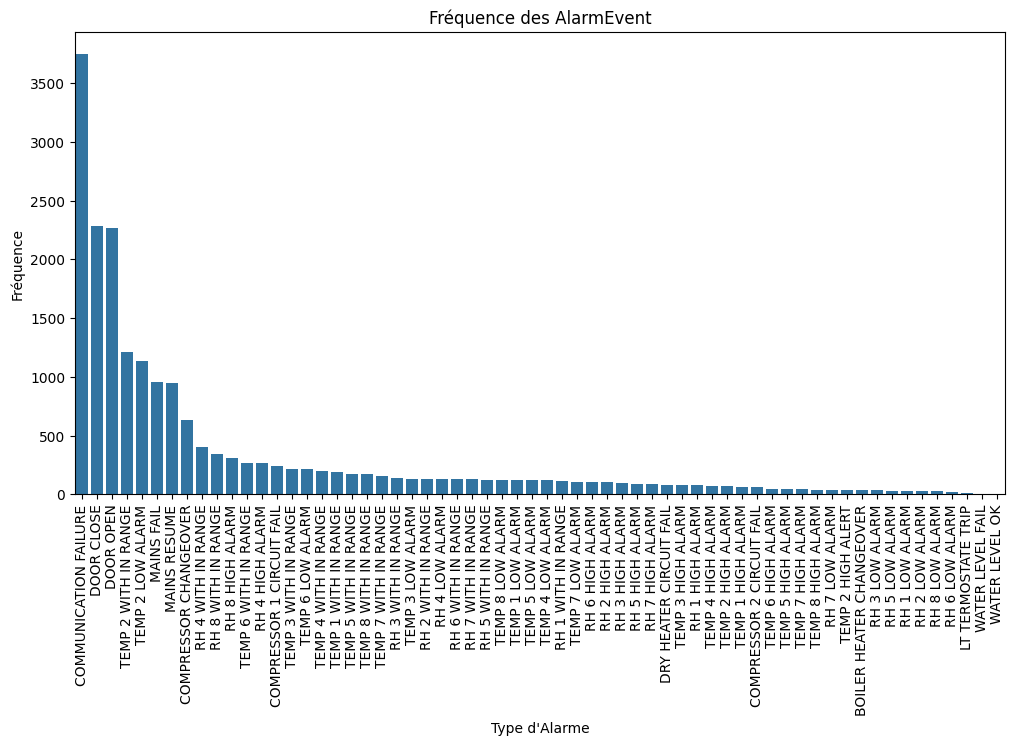

In [ ]:
#barplot of alarmEvent frequencies
event_frequency = df['AlarmEvent'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=event_frequency.index, y=event_frequency.values)
plt.xticks(rotation=90)
plt.title("Fréquence des AlarmEvent")
plt.xlabel("Type d'Alarme")
plt.ylabel("Fréquence")
plt.show()

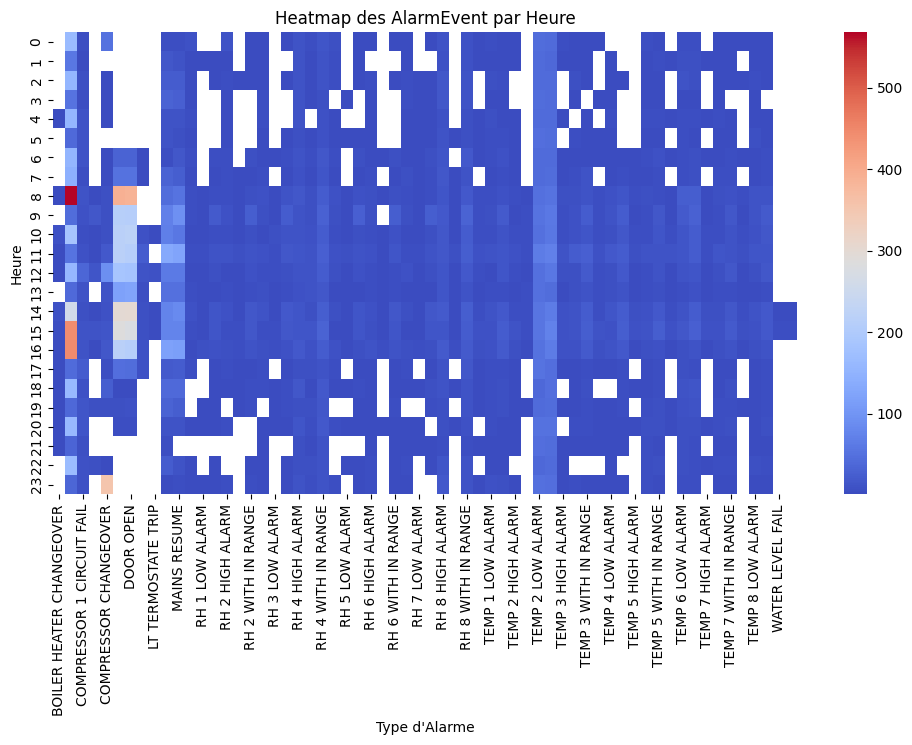

In [ ]:
#heatmap of alarmEvent and hour

df['AlarmLogDateTime'] = pd.to_datetime(df['AlarmLogDateTime'])
df['Hour'] = df['AlarmLogDateTime'].dt.hour
hourly_counts = df.groupby(['Hour', 'AlarmEvent']).size().unstack()

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_counts, cmap="coolwarm", annot=False, fmt='d')
plt.title("Heatmap des AlarmEvent par Heure")
plt.xlabel("Type d'Alarme")
plt.ylabel("Heure")
plt.show()


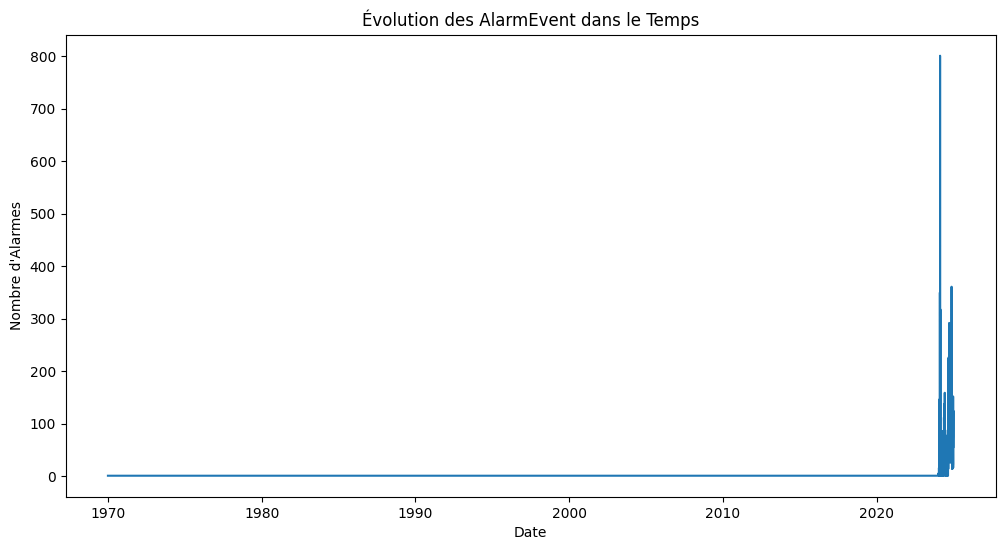

In [ ]:
#Line plot of the number of alarms over time (dates)

daily_counts = df.groupby(df['AlarmLogDateTime'].dt.date).size()

plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line')
plt.title("Évolution des AlarmEvent dans le Temps")
plt.xlabel("Date")
plt.ylabel("Nombre d'Alarmes")
plt.show()


In [ ]:
print((df['AlarmLogDateTime'].dt.year.unique()))
print(len(df['AlarmLogDateTime'].dt.year.unique()))

[2024 1970]
2


#We notice the existence of the outlier 1970, so we remove it.

In [ ]:
df = df[df['AlarmLogDateTime'].dt.year != 1970]

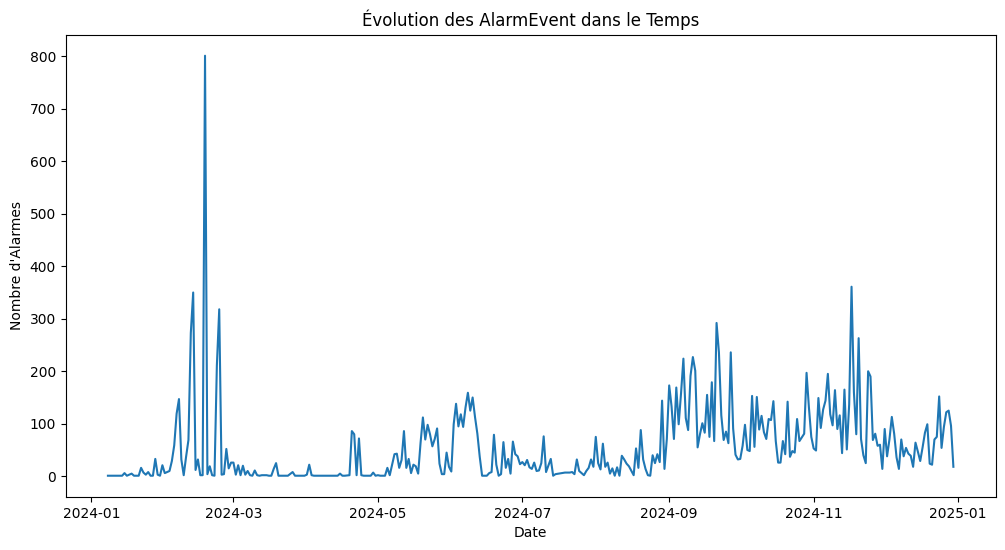

In [ ]:

daily_counts = df.groupby(df['AlarmLogDateTime'].dt.date).size()


plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line')
plt.title("Évolution des AlarmEvent dans le Temps")
plt.xlabel("Date")
plt.ylabel("Nombre d'Alarmes")
plt.show()

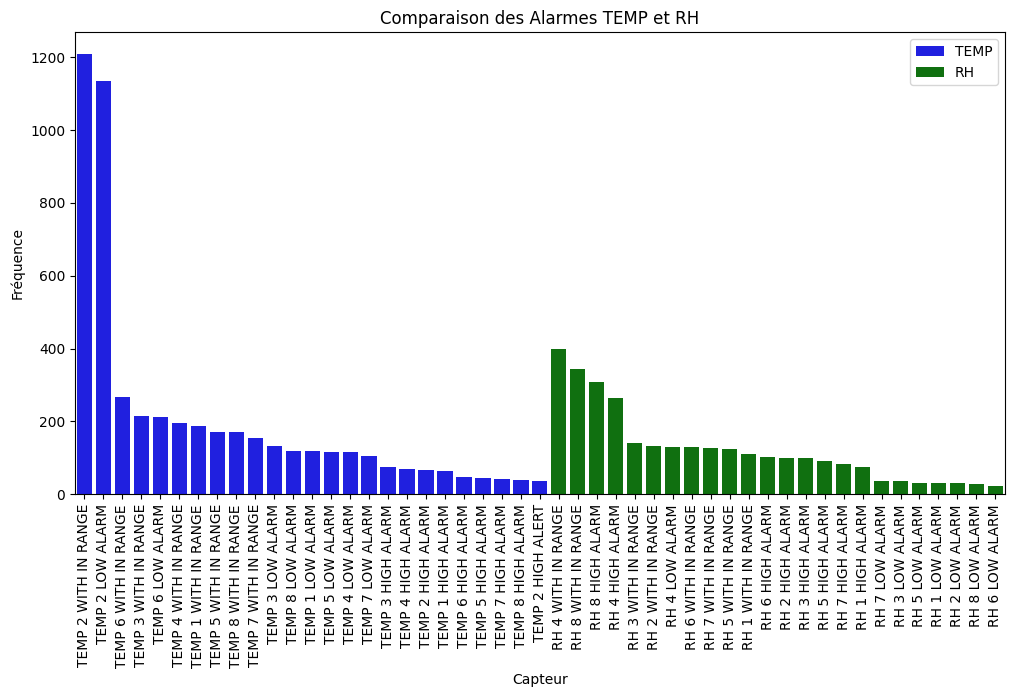

In [ ]:
#Bar plot of the frequencies of events related to humidity and temperature
temp_counts = event_frequency[event_frequency.index.str.contains('TEMP')]
rh_counts = event_frequency[event_frequency.index.str.contains('RH')]

plt.figure(figsize=(12, 6))
sns.barplot(x=temp_counts.index, y=temp_counts.values, color='blue', label='TEMP')
sns.barplot(x=rh_counts.index, y=rh_counts.values, color='green', label='RH')
plt.xticks(rotation=90)
plt.title("Comparaison des Alarmes TEMP et RH")
plt.xlabel("Capteur")
plt.ylabel("Fréquence")
plt.legend()
plt.show()


In [ ]:
# extraction de temperature pv et sv et aussi humidity pv et sv de info
def extract_temperature_sv(info):
    match = re.search(r"~Temperature~SV=([\d.]+)", str(info))
    return float(match.group(1)) if match else np.nan

def extract_temperature_pv(info):
    match = re.search(r"~PV1=([\d.]+)", str(info))
    return float(match.group(1)) if match else np.nan

def extract_humidity_sv(info):
    match = re.search(r"~Humidity~SV=([\d.]+)", str(info))
    return float(match.group(1)) if match else np.nan

def extract_humidity_pv(info):
    match = re.search(r"~PV2=([\d.]+)", str(info))
    return float(match.group(1)) if match else np.nan


# Apply the functions to create new columns.
df['Temperature_SV'] = df['AlarmInfo'].apply(extract_temperature_sv)
df['Temperature_PV'] = df['AlarmInfo'].apply(extract_temperature_pv)
df['Humidity_SV'] = df['AlarmInfo'].apply(extract_humidity_sv)
df['Humidity_PV'] = df['AlarmInfo'].apply(extract_humidity_pv)

print(df.head())

   EquipmentMasterAlarmAuditTrailId  EquipmentMasterId EquipmentName  \
0                             24687                  2    CQ.INC.001   
1                             24688                  2    CQ.INC.001   
2                             24689                  2    CQ.INC.001   
3                             24690                  2    CQ.INC.001   
4                             24691                  2    CQ.INC.001   

     AlarmLogDateTime             AlarmEvent AlarmType AckUserId  \
0 2024-01-08 12:00:00  COMPRESSOR CHANGEOVER         N     admin   
1 2024-01-09 12:00:00  COMPRESSOR CHANGEOVER         N     admin   
2 2024-01-10 12:00:00  COMPRESSOR CHANGEOVER         N     admin   
3 2024-01-11 12:00:00  COMPRESSOR CHANGEOVER         N     admin   
4 2024-01-12 12:00:00  COMPRESSOR CHANGEOVER         N     admin   

               AckDatetime                              AckComments  \
0  2024-01-24 09:44:14.430  Alarm Aknoledg to perform Software test   
1  2024-01-24 09

In [ ]:
#When the event is 'COMMUNICATION FAILURE', we notice that all other information is NaN.
# Add a column to flag 'COMMUNICATION FAILURE'.
df['IsCommunicationFailure'] = df['AlarmEvent'].apply(lambda x: 1 if x == "COMMUNICATION FAILURE" else 0)

# Fill NaN values for 'Communication Failure' with an indicative value.
df.loc[df['IsCommunicationFailure'] == 1, ['Temperature_SV', 'Temperature_PV', 'Humidity_SV', 'Humidity_PV']] = 0



In [ ]:
# Convert NaN to int and fill nan values with-999.
df['Temperature_SV_missing'] = df['Temperature_SV'].isna().astype(int)
df['Temperature_PV_missing'] = df['Temperature_PV'].isna().astype(int)
df['Humidity_SV_missing'] = df['Humidity_SV'].isna().astype(int)
df['Humidity_PV_missing'] = df['Humidity_PV'].isna().astype(int)
df['Temperature_SV'] = df['Temperature_SV'].fillna(-999)
df['Humidity_PV'] = df['Humidity_PV'].fillna(-999)
df['Temperature_PV'] = df['Temperature_PV'].fillna(-999)
df['Humidity_SV'] = df['Humidity_SV'].fillna(-999)
df.head()

,EquipmentMasterAlarmAuditTrailId,EquipmentMasterId,EquipmentName,AlarmLogDateTime,AlarmEvent,AlarmType,AckUserId,AckDatetime,AckComments,ReviewedApprovedStatus,...,Hour,Temperature_SV,Temperature_PV,Humidity_SV,Humidity_PV,IsCommunicationFailure,Temperature_SV_missing,Temperature_PV_missing,Humidity_SV_missing,Humidity_PV_missing
0,24687,2,CQ.INC.001,2024-01-08 12:00:00,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,0,...,12,32.5,0.0,-999.0,-999.0,0,0,0,1,1
1,24688,2,CQ.INC.001,2024-01-09 12:00:00,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,0,...,12,32.5,0.0,-999.0,-999.0,0,0,0,1,1
2,24689,2,CQ.INC.001,2024-01-10 12:00:00,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,0,...,12,32.5,0.0,-999.0,-999.0,0,0,0,1,1
3,24690,2,CQ.INC.001,2024-01-11 12:00:00,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.430,Alarm Aknoledg to perform Software test,0,...,12,32.5,0.0,-999.0,-999.0,0,0,0,1,1
4,24691,2,CQ.INC.001,2024-01-12 12:00:00,COMPRESSOR CHANGEOVER,N,admin,2024-01-24 09:44:14.433,Alarm Aknoledg to perform Software test,0,...,12,32.5,0.0,-999.0,-999.0,0,0,0,1,1


In [ ]:
#calculate Delta_Temperature and Delta_Humidity
df['Delta_Temperature'] = df['Temperature_PV'] - df['Temperature_SV']
df['Delta_Humidity'] = df['Humidity_PV'] - df['Humidity_SV']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19357 entries, 0 to 19375
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   EquipmentMasterAlarmAuditTrailId  19357 non-null  int64         
 1   EquipmentMasterId                 19357 non-null  int64         
 2   EquipmentName                     19357 non-null  object        
 3   AlarmLogDateTime                  19357 non-null  datetime64[ns]
 4   AlarmEvent                        19357 non-null  object        
 5   AlarmType                         19357 non-null  object        
 6   AckUserId                         5952 non-null   object        
 7   AckDatetime                       5952 non-null   object        
 8   AckComments                       5945 non-null   object        
 9   ReviewedApprovedStatus            19357 non-null  int64         
 10  EmailStatus                       19357 non-null  i

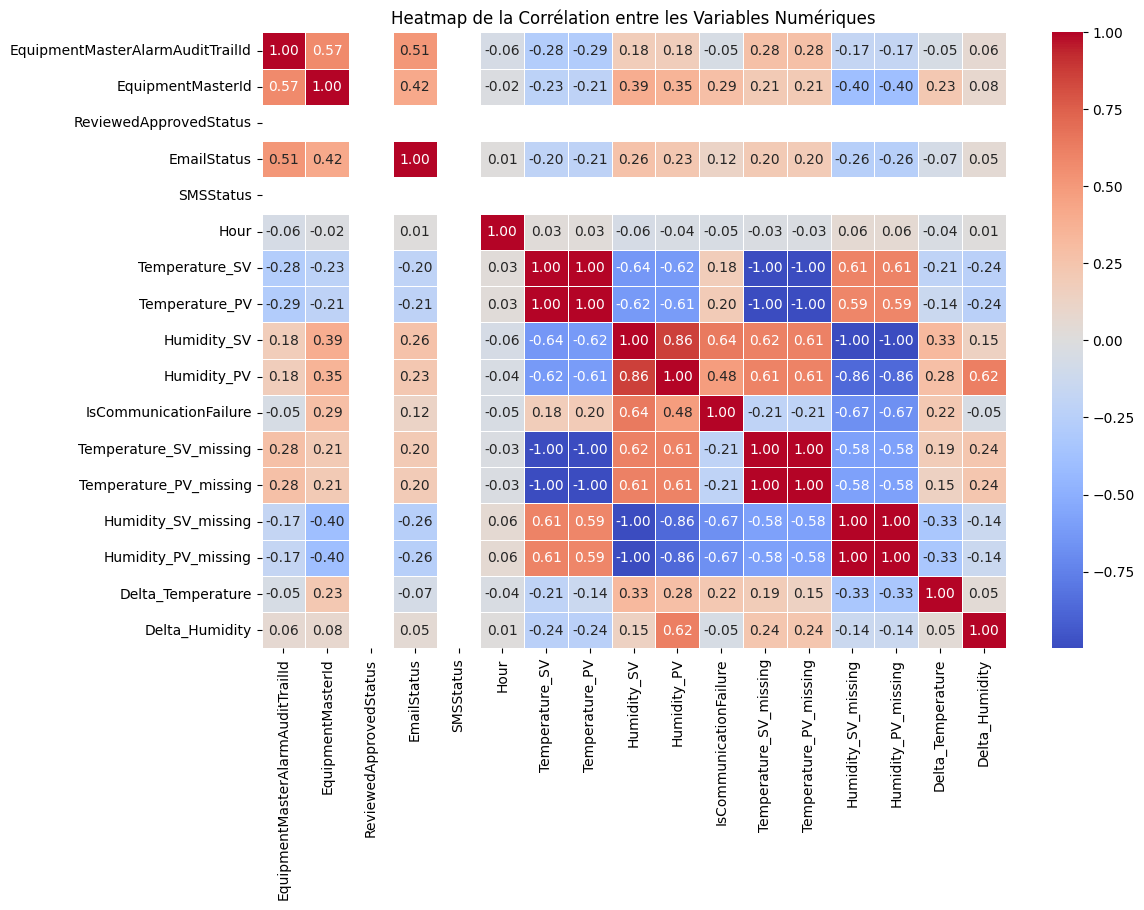

In [ ]:
# A heatmap to visualize correlation between numerical variables.


df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))  # Taille de l'image de la heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Heatmap de la Corrélation entre les Variables Numériques')
plt.show()


# **We notice that there is no linear relationship between the variables, so it is necessary to use algorithms that do not require linearity**

<ipython-input-18-36115632c0f3>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


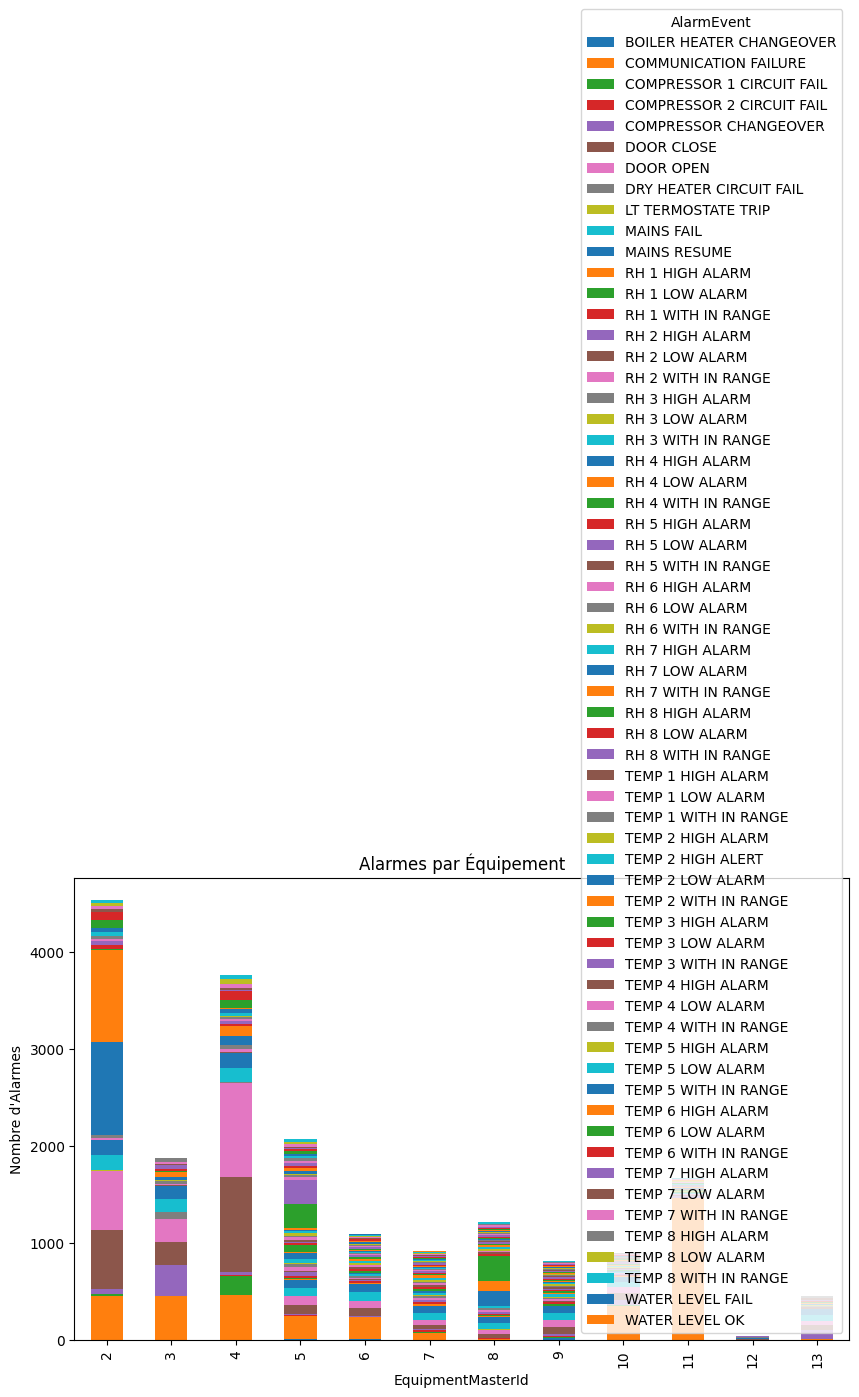

In [ ]:
#Visualize the number of alarms and alarm events by equipment."


alarm_counts = df.groupby(["EquipmentMasterId", "AlarmEvent"]).size().reset_index(name="Count")
pivot_data = alarm_counts.pivot(index="EquipmentMasterId", columns="AlarmEvent", values="Count").fillna(0)
pivot_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Alarmes par Équipement")
plt.xlabel("EquipmentMasterId")
plt.ylabel("Nombre d'Alarmes")
plt.legend(title="AlarmEvent")
plt.tight_layout()
plt.show()


In [ ]:
def classify_event_gravity(event):
    # high gravity
    if "HIGH ALARM" in event or event in [
        "MAINS FAIL", "MAINS RESUME",
        "COMPRESSOR 1 CIRCUIT FAIL", "COMPRESSOR 2 CIRCUIT FAIL",
        "LT TERMOSTATE TRIP", "DRY HEATER CIRCUIT FAIL",
        "COMMUNICATION FAILURE", "WATER LEVEL FAIL"
    ]:
        return "high"
    # medium gravity
    elif "LOW ALARM" in event or event in [
        "DOOR OPEN", "DOOR CLOSE",
        "COMPRESSOR CHANGEOVER", "BOILER HEATER CHANGEOVER"
    ]:
        return "medium"
    # low gravity
    elif "WITH IN RANGE" in event or event in [
        "WATER LEVEL OK"
    ]:
        return "low"
    else:
        return "unknown"


#label_encoding
df["Gravity"] = df["AlarmEvent"].apply(classify_event_gravity)

gravity_encoding = {'low': 0, 'medium': 1, 'high': 2}
df['Event_gravity_Encoded'] = df['Gravity'].map(gravity_encoding)

print(df.head())
df.info()

   EquipmentMasterAlarmAuditTrailId  EquipmentMasterId EquipmentName  \
0                             24687                  2    CQ.INC.001   
1                             24688                  2    CQ.INC.001   
2                             24689                  2    CQ.INC.001   
3                             24690                  2    CQ.INC.001   
4                             24691                  2    CQ.INC.001   

     AlarmLogDateTime             AlarmEvent AlarmType AckUserId  \
0 2024-01-08 12:00:00  COMPRESSOR CHANGEOVER         N     admin   
1 2024-01-09 12:00:00  COMPRESSOR CHANGEOVER         N     admin   
2 2024-01-10 12:00:00  COMPRESSOR CHANGEOVER         N     admin   
3 2024-01-11 12:00:00  COMPRESSOR CHANGEOVER         N     admin   
4 2024-01-12 12:00:00  COMPRESSOR CHANGEOVER         N     admin   

               AckDatetime                              AckComments  \
0  2024-01-24 09:44:14.430  Alarm Aknoledg to perform Software test   
1  2024-01-24 09

In [ ]:
print(len(df['AlarmEvent'].unique()))

62


In [ ]:
label_encoder = LabelEncoder()

# Label Encoding of "AlarmEvent"
df["AlarmEvent_encoded"] = label_encoder.fit_transform(df["AlarmEvent"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19357 entries, 0 to 19375
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   EquipmentMasterAlarmAuditTrailId  19357 non-null  int64         
 1   EquipmentMasterId                 19357 non-null  int64         
 2   EquipmentName                     19357 non-null  object        
 3   AlarmLogDateTime                  19357 non-null  datetime64[ns]
 4   AlarmEvent                        19357 non-null  object        
 5   AlarmType                         19357 non-null  object        
 6   AckUserId                         5952 non-null   object        
 7   AckDatetime                       5952 non-null   object        
 8   AckComments                       5945 non-null   object        
 9   ReviewedApprovedStatus            19357 non-null  int64         
 10  EmailStatus                       19357 non-null  i

# **Now we move on to training the algorithms.**

# RandomForestClassifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

# Dividing X and y
X = df[['Temperature_SV', 'Temperature_PV', 'Delta_Temperature', 'Humidity_SV',
        'Humidity_PV', 'Delta_Humidity', 'IsCommunicationFailure', 'Temperature_SV_missing',
        'Temperature_PV_missing', 'Humidity_SV_missing', 'Humidity_PV_missing','Event_gravity_Encoded','Hour']]
y = df[['AlarmEvent_encoded', 'EquipmentMasterId']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("AlarmEvent Report:")
print(classification_report(y_test['AlarmEvent_encoded'], y_pred[:, 0]))
print("EquipmentMasterId Report:")
print(classification_report(y_test['EquipmentMasterId'], y_pred[:, 1]))


AlarmEvent Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      1.00      1.00       762
           2       0.32      0.46      0.38        39
           3       0.00      0.00      0.00        16
           4       0.87      0.84      0.86       121
           5       0.43      0.43      0.43       439
           6       0.41      0.41      0.41       415
           7       1.00      0.21      0.35        14
           8       0.00      0.00      0.00         2
           9       0.29      0.32      0.30       203
          10       0.31      0.31      0.31       214
          11       0.10      0.12      0.11         8
          12       0.00      0.00      0.00         3
          13       0.28      0.41      0.33        17
          14       0.07      0.04      0.05        23
          15       0.00      0.00      0.00         9
          16       0.28      0.29      0.29        24
        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# For EquipmentMasterId, we notice an acceptable accuracy of 0.79, but for AlarmEvent, not really, and we observe an imbalance in the classes, we test other algorithms

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Diviser X et y
X = df[['Temperature_SV', 'Temperature_PV', 'Delta_Temperature', 'Humidity_SV',
        'Humidity_PV', 'Delta_Humidity', 'IsCommunicationFailure', 'Temperature_SV_missing',
        'Temperature_PV_missing', 'Humidity_SV_missing', 'Humidity_PV_missing','Event_gravity_Encoded','Hour','EquipmentMasterId']]
y = df[['AlarmEvent_encoded']]  # Deux cibles

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle XGBoost
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # Pour classification multi-classes
    num_class=len(set(y)),      # Nombre de classes
    eval_metric='mlogloss',     # Log-loss pour multi-classes
    use_label_encoder=False,    # Évite les warnings inutiles
    n_estimators=100,           # Nombre d'arbres
    max_depth=6,                # Profondeur maximale
    learning_rate=0.1,          # Taux d'apprentissage
    subsample=0.8,              # Fraction des données utilisées pour chaque arbre
    colsample_bytree=0.8        # Fraction des colonnes utilisées pour chaque arbre
)

# Entraîner le modèle
xgb_model.fit(X_train, y_train)

# Prédire sur le test
y_pred = xgb_model.predict(X_test)

# Évaluer les performances
print("Rapport de classification (XGBoost):")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:47:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Rapport de classification (XGBoost):
              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       1.00      1.00      1.00       762
           2       0.44      0.49      0.46        39
           3       0.00      0.00      0.00        16
           4       0.92      0.81      0.86       121
           5       0.41      0.40      0.40       439
           6       0.40      0.43      0.42       415
           7       0.71      0.86      0.77        14
           8       0.00      0.00      0.00         2
           9       0.33      0.35      0.34       203
          10       0.34      0.33      0.33       214
          11       0.06      0.12      0.08         8
          12       0.00      0.00      0.00         3
          13       0.30      0.41      0.35        17
          14       0.10      0.04      0.06        23
          15       0.17      0.11      0.13         9
          16       0.24      0.21      0.22 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Sélectionner les caractéristiques
X = df[['Temperature_SV', 'Temperature_PV', 'Delta_Temperature', 'Humidity_SV',
        'Humidity_PV', 'Delta_Humidity', 'IsCommunicationFailure', 'Temperature_SV_missing',
        'Temperature_PV_missing', 'Humidity_SV_missing', 'Humidity_PV_missing','Hour','EquipmentMasterId', 'Gravity']]
y = df[['AlarmEvent']]  # La cible

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Définir les colonnes catégoriques
cat_features = ['Gravity']  # Colonnes catégoriques

# Initialiser le modèle CatBoost
cat_model = CatBoostClassifier(iterations=200,  # Réduction du nombre d'itérations pour accélérer l'entraînement
    depth=6,         # Profondeur de l'arbre plus faible pour une vitesse d'entraînement plus rapide
    learning_rate=0.1,  # Augmenter le taux d'apprentissage pour accélérer
    loss_function='MultiClass',  # Classification multi-classes
    verbose=100,  # Afficher les logs toutes les 100 itérations
    thread_count=4  )  # Afficher les logs toutes les 100 itérations

# Entraîner le modèle
cat_model.fit(X_train, y_train, cat_features=cat_features)

# Prédire sur le jeu de test
y_pred = cat_model.predict(X_test)

# Évaluer les performances
print("Précision :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



0:	learn: 2.4062629	total: 5.66s	remaining: 18m 45s
100:	learn: 0.9342560	total: 7m 29s	remaining: 7m 20s
199:	learn: 0.8573241	total: 18m 16s	remaining: 0us
Précision : 0.5699896694214877
                           precision    recall  f1-score   support

 BOILER HEATER CHANGEOVER       0.00      0.00      0.00         7
    COMMUNICATION FAILURE       1.00      1.00      1.00       749
COMPRESSOR 1 CIRCUIT FAIL       0.54      0.52      0.53        48
COMPRESSOR 2 CIRCUIT FAIL       0.00      0.00      0.00        13
    COMPRESSOR CHANGEOVER       0.95      0.75      0.84       126
               DOOR CLOSE       0.43      0.49      0.46       457
                DOOR OPEN       0.45      0.43      0.44       453
  DRY HEATER CIRCUIT FAIL       0.57      0.25      0.35        16
       LT TERMOSTATE TRIP       0.00      0.00      0.00         2
               MAINS FAIL       0.39      0.32      0.35       191
             MAINS RESUME       0.39      0.52      0.45       189
      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
